In [1]:
import pandas as pd 
import sidetable as stb
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 10)
pd.options.display.max_columns = None

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis ayer.

1. Pregunta teórica: ¿Qué diferencia existe entre la covarianza y la correlación?

    La covarianza indica la dirección de la relación entre dos variables y la correlación nos indica también la intensidad de esa relación


2. Calculad la covarianza y la correlación de nuestro dataset. No nos vale solo con que la calculéis, debéis hacer una interpretación de los resultados obtenidos. Calculad solo la correlación de Pearson.

In [2]:
df = pd.read_pickle('../data/regresion_lineal/supermarket_1.pkl')
df.sample(10)

,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_income,rating,month,shift
54,Mandalay,Normal,Male,Home and lifestyle,16.16,2,1.6160,33.9360,2019-03-07,11:49,Ewallet,32.32,1.6160,6.5,March,Morning
507,Mandalay,Normal,Female,Food and beverages,84.05,6,25.2150,529.5150,2019-01-29,10:48,Credit card,504.30,25.2150,7.7,January,Morning
779,Mandalay,Member,Male,Electronic accessories,87.87,9,39.5415,830.3715,2019-01-31,20:32,Ewallet,790.83,39.5415,5.6,January,Afternoon
632,Yangon,Member,Male,Food and beverages,83.77,2,8.3770,175.9170,2019-01-15,10:54,Credit card,167.54,8.3770,7.0,January,Morning
586,Yangon,Normal,Female,Food and beverages,52.34,3,7.8510,164.8710,2019-03-27,14:03,Cash,157.02,7.8510,9.2,March,Morning
674,Yangon,Normal,Female,Electronic accessories,45.48,10,22.7400,477.5400,2019-03-01,10:22,Credit card,454.80,22.7400,4.8,March,Morning
396,Yangon,Normal,Female,Food and beverages,54.27,5,13.5675,284.9175,2019-03-13,14:16,Ewallet,271.35,13.5675,4.6,March,Morning
241,Yangon,Normal,Male,Health and beauty,59.77,2,5.9770,125.5170,2019-03-11,12:01,Credit card,119.54,5.9770,5.8,March,Morning
250,Mandalay,Member,Male,Food and beverages,46.55,9,20.9475,439.8975,2019-02-02,15:34,Ewallet,418.95,20.9475,6.4,February,Afternoon
119,Mandalay,Normal,Male,Home and lifestyle,53.44,2,5.3440,112.2240,2019-01-20,20:38,Ewallet,106.88,5.3440,4.1,January,Afternoon


In [3]:
df_num = df.select_dtypes(include= ["float64", "int64"])
df_num.sample(2)

,unit_price,tax_5%,total,cogs,gross_income,rating
727,69.74,34.870,732.270,697.4,34.870,8.9
571,26.67,13.335,280.035,266.7,13.335,8.6


In [4]:
df_num.cov()

,unit_price,tax_5%,total,cogs,gross_income,rating
unit_price,701.965331,196.668340,4130.035142,3933.366802,196.668340,-0.399668
tax_5%,196.668340,137.096594,2879.028477,2741.931883,137.096594,-0.733300
total,4130.035142,2879.028477,60459.598018,57580.569541,2879.028477,-15.399306
cogs,3933.366802,2741.931883,57580.569541,54838.637658,2741.931883,-14.666006
gross_income,196.668340,137.096594,2879.028477,2741.931883,137.096594,-0.733300
rating,-0.399668,-0.733300,-15.399306,-14.666006,-0.733300,2.953518


In [5]:
df_num.corr(method = 'pearson')

,unit_price,tax_5%,total,cogs,gross_income,rating
unit_price,1.000000,0.633962,0.633962,0.633962,0.633962,-0.008778
tax_5%,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
total,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
cogs,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
gross_income,0.633962,1.000000,1.000000,1.000000,1.000000,-0.036442
rating,-0.008778,-0.036442,-0.036442,-0.036442,-0.036442,1.000000


- Interpretación de los resultados obtenidos: la mayoría de nuestras variables tienen una relación muy fuerte porque son dependientes entre sí. El precio determina los impuestos, el margen de beneficio, etc.



3. Con los resultados de la correlación del ejercicio anterior, cread un heatmap.

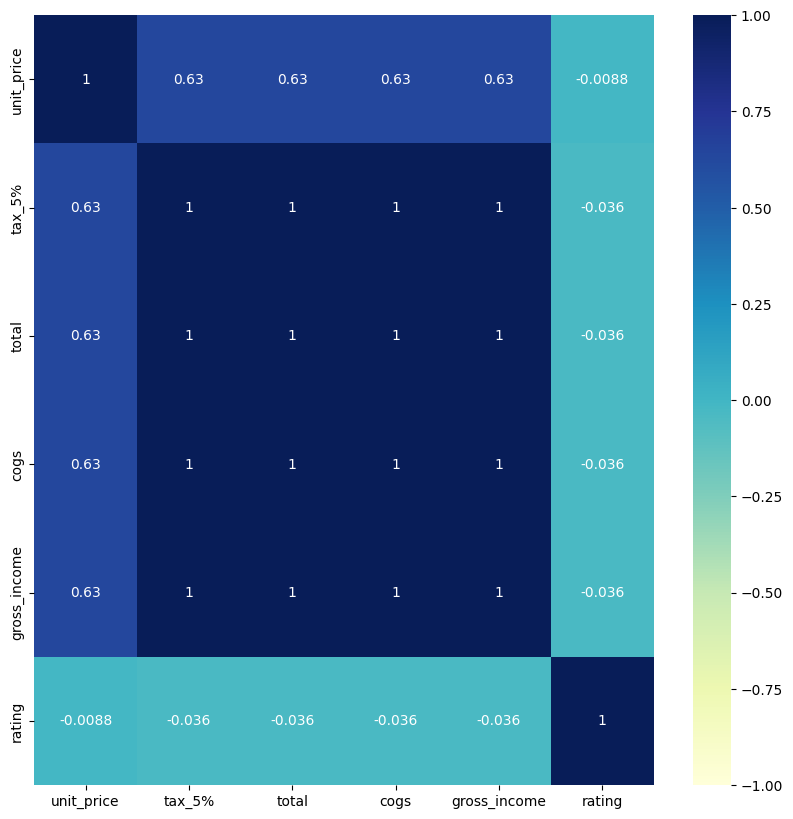

In [6]:
sns.heatmap(df_num.corr(),
            vmax = 1,
            vmin = -1,
            cmap = "YlGnBu",
           annot = True); 

4. Guardad la gráfica del heatmap.


Procedemos a eliminar las columnas altamente dependientes para continuar analizando nuestros datos de una maneras más real.

In [10]:
#Eliminamos 'tax_5%', 'cogs', 'gross_income' por su alta correlación (1) con la columna total.

df = df.drop(['tax_5%', 'cogs', 'gross_income'], axis = 1)

KeyError: "['tax_5%', 'cogs', 'gross_income'] not found in axis"

In [11]:
# guardamos el df en formato pickle:

df.to_pickle('../data/regresion_lineal/supermarket_2.pkl')